In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('C:\\Users\\Home\\Desktop\\Data Science\\DS_Internship\\Assignments\\Case Study\\Flipkart_laptop\\laptop_details.csv')

In [109]:
df.head(1)

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...


In [110]:
#pd.set_option('display.max_colwidth', None)

In [111]:
df.shape

(720, 4)

In [112]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [113]:
regex = r'^\w+'
df['Brand'] = df['Product'].apply(lambda x : re.findall(regex,x))

In [114]:
regex = r'^(?:AMD|Intel|Apple)[\s\w]+Processor'
df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex,x))

In [115]:
regex = r'(?:[0-9][0-9]th).Gen'
df['Gen'] = df['Feature'].apply(lambda x : re.findall(regex,x))

In [116]:
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex,x))

In [117]:
regex = r'DDR\d'
df['Type'] = df['Feature'].apply(lambda x : re.findall(regex,x))

In [118]:
regex = r'[\d]+[\s]bit[\s\w]+Operating System'
df['OS'] = df['Feature'].apply(lambda x : re.findall(regex,x))

In [119]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex,x))

In [120]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,Gen,RAM,Type,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],[11th Gen],[8 GB DDR4 RAM],[DDR4],[64 bit Windows 11 Operating System],[256 GB SSD]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i3 Processor],[11th Gen],[8 GB DDR4 RAM],[DDR4],[64 bit Windows 11 Operating System],[512 GB SSD]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i3 Processor],[10th Gen],[8 GB DDR4 RAM],[DDR4],[64 bit Windows 11 Operating System],[512 GB SSD]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[HP],[AMD Ryzen 5 Hexa Core Processor],[],[8 GB DDR4 RAM],[DDR4],[64 bit Windows 10 Operating System],[512 GB SSD]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[ASUS],[Intel Core i5 Processor],[10th Gen],[8 GB DDR4 RAM],[DDR4],[],[512 GB SSD]


In [121]:
df.tail()

,Product,Rating,MRP,Feature,Brand,Processor,Gen,RAM,Type,OS,Storage
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[ASUS],[Intel Celeron Dual Core Processor],[],[4 GB LPDDR4 RAM],[DDR4],[],[]
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,[Lenovo],[AMD Ryzen 7 Octa Core Processor],[],[8 GB DDR4 RAM],[DDR4],[64 bit Windows 11 Operating System],[512 GB SSD]
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,[ASUS],[AMD Ryzen 9 Octa Core Processor],[],[16 GB DDR5 RAM],[DDR5],[64 bit Windows 11 Operating System],[1 TB SSD]
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,[ASUS],[Intel Core i7 Processor],[12th Gen],[16 GB LPDDR5 RAM],[DDR5],[64 bit Windows 11 Operating System],[512 GB SSD]
719,Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...,4.2,"₹50,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Lenovo],[Intel Core i5 Processor],[10th Gen],[8 GB DDR4 RAM],[DDR4],[64 bit Windows 10 Operating System],"[1 TB HDD, 256 GB SSD]"


In [122]:
df['Brand'] = df['Brand'].apply(lambda x : ''.join(x))
df['Processor'] = df['Processor'].apply(lambda x : ''.join(x))
df['Gen'] = df['Gen'].apply(lambda x : ''.join(x))
df['RAM'] = df['RAM'].apply(lambda x : ''.join(x))
df['Type'] = df['Type'].apply(lambda x : ''.join(x))
df['OS'] = df['OS'].apply(lambda x : ''.join(x))
df['Storage'] = df['Storage'].apply(lambda x : ''.join(x))

In [123]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,Gen,RAM,Type,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor,11th Gen,8 GB DDR4 RAM,DDR4,64 bit Windows 11 Operating System,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor,11th Gen,8 GB DDR4 RAM,DDR4,64 bit Windows 11 Operating System,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3 Processor,10th Gen,8 GB DDR4 RAM,DDR4,64 bit Windows 11 Operating System,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core Processor,,8 GB DDR4 RAM,DDR4,64 bit Windows 10 Operating System,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5 Processor,10th Gen,8 GB DDR4 RAM,DDR4,,512 GB SSD


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Brand      720 non-null    object 
 5   Processor  720 non-null    object 
 6   Gen        720 non-null    object 
 7   RAM        720 non-null    object 
 8   Type       720 non-null    object 
 9   OS         720 non-null    object 
 10  Storage    720 non-null    object 
dtypes: float64(1), object(10)
memory usage: 62.0+ KB


In [125]:
df.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
Brand          0
Processor      0
Gen            0
RAM            0
Type           0
OS             0
Storage        0
dtype: int64

In [126]:
df.Brand.unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [127]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Brand', 'Processor', 'Gen',
       'RAM', 'Type', 'OS', 'Storage'],
      dtype='object')

In [128]:
df['MRP'] = df['MRP'].str.replace(',','').str.replace('₹','')

In [129]:
df['MRP'] = df['MRP'].astype('float')

<AxesSubplot:>

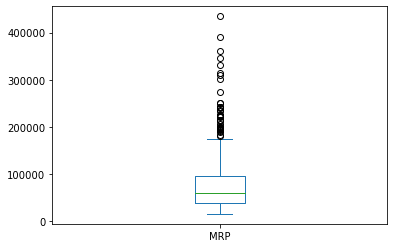

In [130]:
df['MRP'].plot(kind = 'box')

In [131]:
df = df[df['MRP'] <= 200000]

<AxesSubplot:>

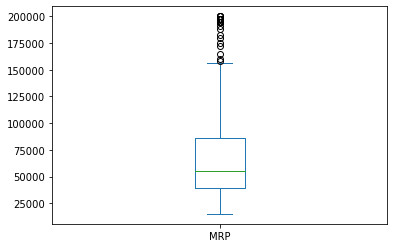

In [132]:
df['MRP'].plot(kind = 'box')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 719
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    693 non-null    object 
 1   Rating     569 non-null    float64
 2   MRP        693 non-null    float64
 3   Feature    693 non-null    object 
 4   Brand      693 non-null    object 
 5   Processor  693 non-null    object 
 6   Gen        693 non-null    object 
 7   RAM        693 non-null    object 
 8   Type       693 non-null    object 
 9   OS         693 non-null    object 
 10  Storage    693 non-null    object 
dtypes: float64(2), object(9)
memory usage: 65.0+ KB


In [134]:
df['Rating'].mean()

4.313356766256586

In [135]:
df['Rating'].median()

4.3

In [136]:
df['Rating'].mode()

0    4.2
Name: Rating, dtype: float64

<AxesSubplot:>

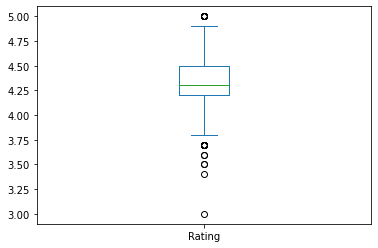

In [137]:
df['Rating'].plot(kind = 'box')

In [138]:
df['Rating'].value_counts()

4.2    165
4.3     71
4.4     58
4.1     55
4.6     50
4.5     48
4.0     27
4.9     26
3.9     15
4.7     15
3.7     11
5.0     10
4.8      8
3.8      4
3.5      2
3.6      2
3.4      1
3.0      1
Name: Rating, dtype: int64

In [139]:
df['Rating'] = df['Rating'].fillna(math.floor(df['Rating'].mode()))
df['Rating']

0      4.2
1      4.2
2      4.3
3      4.4
4      4.4
      ... 
715    4.0
716    4.5
717    4.0
718    3.0
719    4.2
Name: Rating, Length: 693, dtype: float64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 719
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    693 non-null    object 
 1   Rating     693 non-null    float64
 2   MRP        693 non-null    float64
 3   Feature    693 non-null    object 
 4   Brand      693 non-null    object 
 5   Processor  693 non-null    object 
 6   Gen        693 non-null    object 
 7   RAM        693 non-null    object 
 8   Type       693 non-null    object 
 9   OS         693 non-null    object 
 10  Storage    693 non-null    object 
dtypes: float64(2), object(9)
memory usage: 65.0+ KB


In [141]:
df.groupby(['Brand']).agg({'MRP' : ['max', 'min', ('mean')]})

MRP                         
                max       min           mean
Brand                                       
ALIENWARE  199990.0  199990.0  199990.000000
APPLE      181990.0   88990.0  124759.230769
ASUS       199990.0   14990.0  108994.479167
DELL       137990.0   30428.0   59558.491228
GIGABYTE    73990.0   73990.0   73990.000000
HP         199990.0   25990.0   65195.557377
Infinix     52990.0   20990.0   36890.000000
Lenovo     157990.0   19490.0   45454.709184
MSI        200000.0   43990.0   94767.653846
Nokia       50490.0   50490.0   50490.000000
RedmiBook   39990.0   31990.0   39731.935484
SAMSUNG     59990.0   32990.0   46490.000000
Ultimus     19990.0   15990.0   17990.000000
Vaio        40990.0   40990.0   40990.000000
acer       155490.0   24990.0   64314.742857
realme      64999.0   46990.0   54324.833333

<AxesSubplot:xlabel='Brand'>

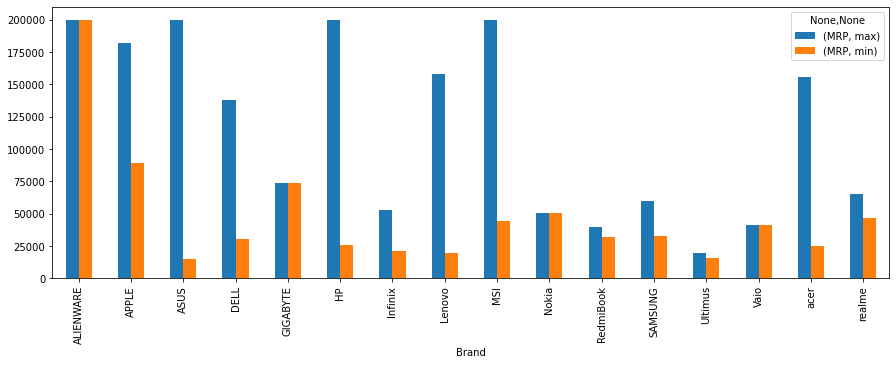

In [142]:
df.groupby(['Brand']).agg({'MRP' : ['max', 'min']}).plot(kind = 'bar', figsize = (15, 5))

In [143]:
df['Processor'] = df['Processor'].str.replace('Processor', '')

<AxesSubplot:xlabel='Processor'>

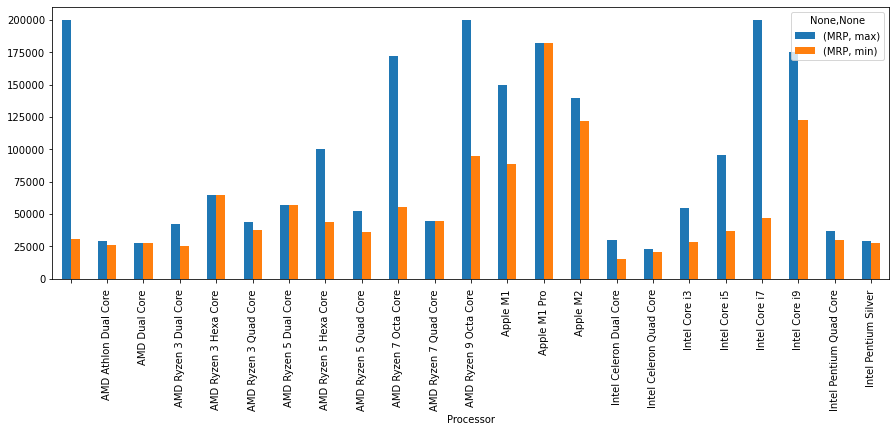

In [144]:
df.groupby(['Processor']).agg({'MRP' : ['max', 'min']}).plot(kind = 'bar', figsize = (15, 5))

Text(0, 0.5, 'MRP')

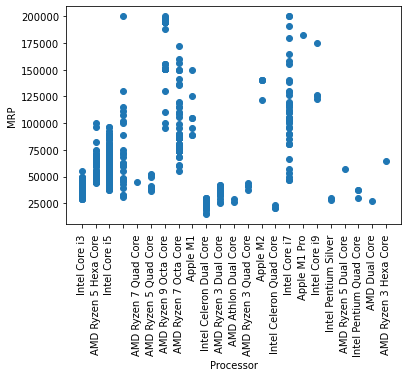

In [145]:
plt.scatter(df['Processor'], df['MRP'])
plt.xlabel('Processor')
plt.xticks(rotation = 90)
plt.ylabel('MRP')

In [146]:
df['RAM'] = df['RAM'].str.replace('RAM', '').str.replace('Memory', '').str.replace('Unified', '')
df['RAM'] = df['RAM'].str.replace('DDR4', '').str.replace('DDR3', '').str.replace('DDR5', '')
df['RAM'] = df['RAM'].str.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and",'')

<AxesSubplot:ylabel='RAM'>

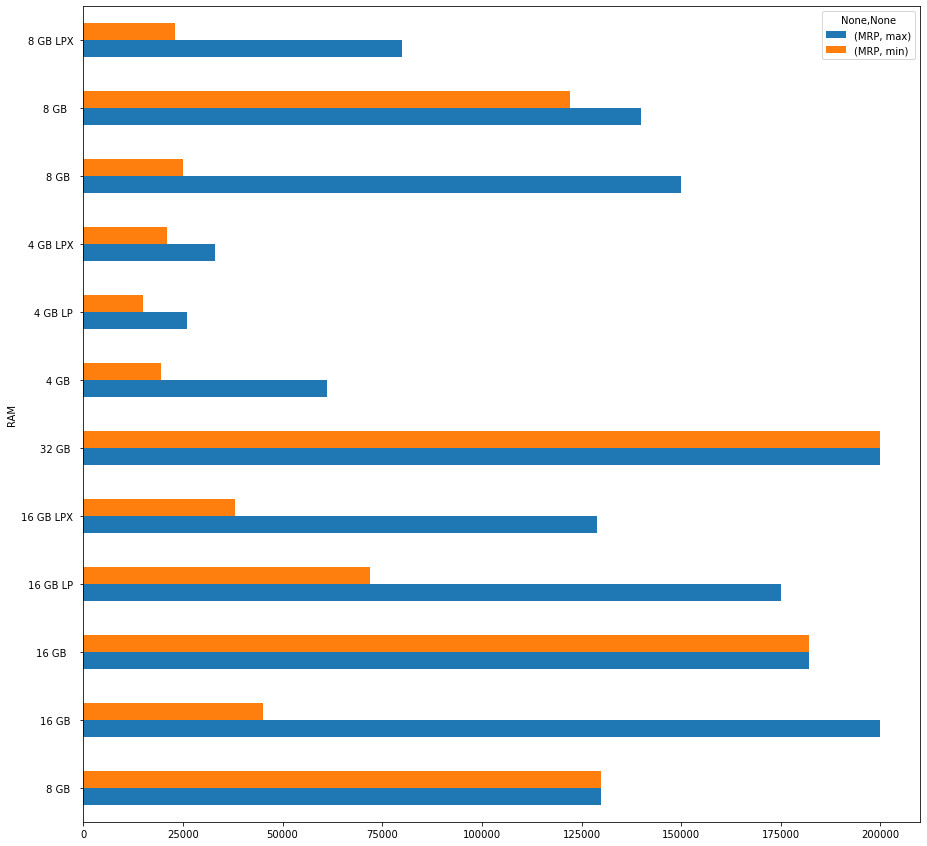

In [147]:
df.groupby(['RAM']).agg({'MRP' : ['max', 'min']}).plot(kind = 'barh', figsize = (15, 15))

Text(0, 0.5, 'MRP')

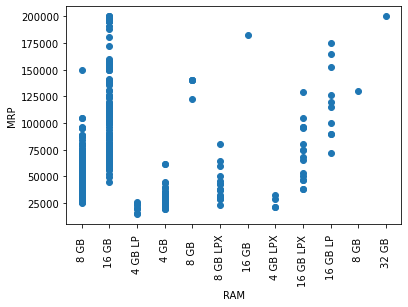

In [148]:
plt.scatter(df['RAM'], df['MRP'])
plt.xlabel('RAM')
plt.xticks(rotation = 90)
plt.ylabel('MRP')

<AxesSubplot:xlabel='Storage'>

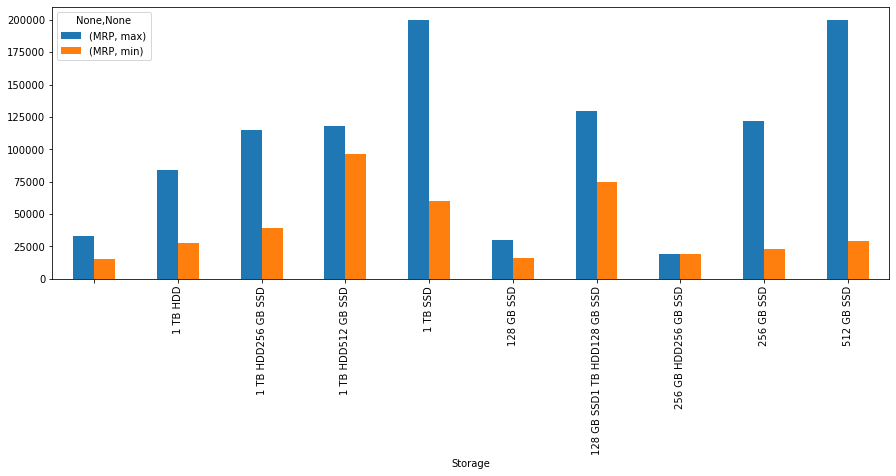

In [149]:
df.groupby(['Storage']).agg({'MRP' : ['max', 'min']}).plot(kind = 'bar', figsize = (15, 5))

Text(0, 0.5, 'MRP')

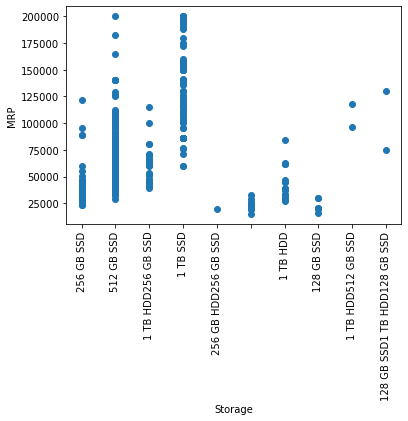

In [150]:
plt.scatter(df['Storage'], df['MRP'])
plt.xlabel('Storage')
plt.xticks(rotation = 90)
plt.ylabel('MRP')

In [151]:
df['OS'] = df['OS'].str.replace('Operating System', '')

<AxesSubplot:ylabel='OS'>

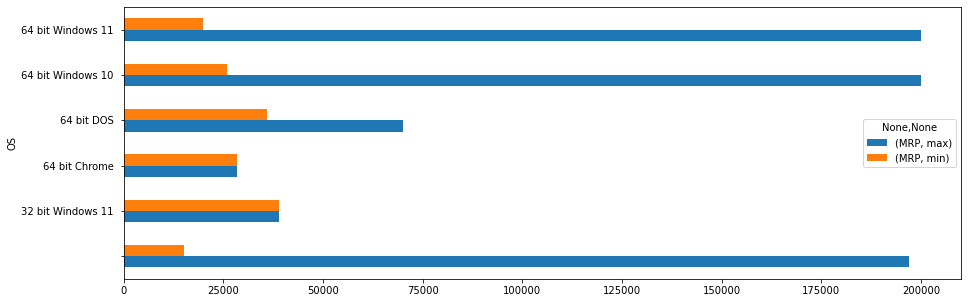

In [152]:
df.groupby(['OS']).agg({'MRP' : ['max', 'min']}).plot(kind = 'barh', figsize = (15, 5))

In [153]:
df.dtypes

Product       object
Rating       float64
MRP          float64
Feature       object
Brand         object
Processor     object
Gen           object
RAM           object
Type          object
OS            object
Storage       object
dtype: object

In [154]:
df['Processor'].value_counts()

Intel Core i5               150
Intel Core i3               129
AMD Ryzen 9 Octa Core        84
AMD Ryzen 7 Octa Core        76
AMD Ryzen 5 Hexa Core        48
AMD Ryzen 3 Dual Core        42
Intel Core i7                42
AMD Ryzen 5 Quad Core        37
                             30
Intel Celeron Dual Core      20
Apple M1                      7
Apple M2                      5
Intel Core i9                 4
AMD Ryzen 3 Quad Core         4
Intel Celeron Quad Core       3
Intel Pentium Quad Core       3
Intel Pentium Silver          2
AMD Athlon Dual Core          2
Apple M1 Pro                  1
AMD Ryzen 5 Dual Core         1
AMD Ryzen 7 Quad Core         1
AMD Dual Core                 1
AMD Ryzen 3 Hexa Core         1
Name: Processor, dtype: int64

In [155]:
df['RAM'].value_counts()

8 GB          381
16 GB         225
4 GB           26
8 GB LPX       16
16 GB LPX      16
16 GB LP       10
4 GB LP         7
8 GB            5
4 GB LPX        4
16 GB           1
 8 GB           1
32 GB           1
Name: RAM, dtype: int64

# ML Algorithm

In [156]:
X = df[['Processor', 'RAM', 'Storage']] #input
Y = df['MRP'] #target

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, \
                                                                    random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(485, 3) (485,)
(208, 3) (208,)


In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [159]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2])

],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_test_pred = pipe.predict(X_test)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('R2 Score: ', r2_score(y_test, y_test_pred)*100)

Mean Absolute Error:  12193.272697180899
R2 Score:  85.48841816041977


In [160]:
X.head(1)

,Processor,RAM,Storage
0,Intel Core i3,8 GB,256 GB SSD


In [161]:
# encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown = 'ignore')

# X_train_transformed = pd.DataFrame(encoder.fit_transform(X_train), 
#                                    columns=encoder.get_feature_names_out(X_train.columns), 
#                                    index = X_train.index)

In [162]:
# X_test_transformed = pd.DataFrame(encoder.transform(X_test), 
#                                columns = encoder.get_feature_names_out(X_train.columns), 
#                                index = X_test.index)

In [163]:
# model = LinearRegression()
# model.fit(X_train_transformed, y_train)

In [164]:
# y_test_pred = model.predict(X_test_transformed)

In [165]:
# from sklearn import metrics

# print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

# print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

# print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [166]:
diff = y_test - y_test_pred
diff

467   -19304.047320
144    12216.350286
620    12216.350286
594    -5085.908095
366   -12787.171847
           ...     
71     -7612.624309
670    12216.350286
412    11850.681855
317   -12787.171847
322    10321.134317
Name: MRP, Length: 208, dtype: float64

<AxesSubplot:xlabel='MRP', ylabel='Density'>

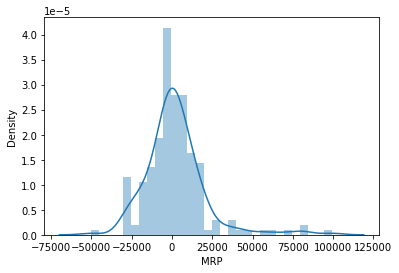

In [167]:
sns.distplot(diff)

<AxesSubplot:xlabel='MRP', ylabel='Count'>

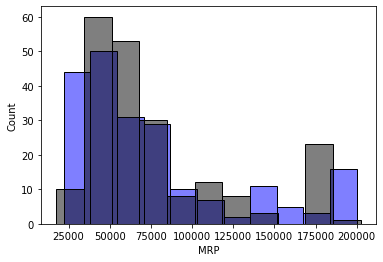

In [168]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='black', alpha=0.5)

In [169]:
temp_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_test_pred})
temp_df

,Actual,Predicted
467,85990.0,105294.047320
144,73490.0,61273.649714
620,73490.0,61273.649714
594,89990.0,95075.908095
366,39990.0,52777.171847
...,...,...
71,44990.0,52602.624309
670,73490.0,61273.649714
412,71345.0,59494.318145
317,39990.0,52777.171847


In [170]:
# from sklearn.metrics import r2_score
# # r2_score(y_test, y_test_pred)*100

In [171]:
import pickle
pickle.dump(df, open('file.pkl', 'wb'))
pickle.dump(pipe, open('reg.pkl', 'wb'))

In [172]:
X_train.head(1)

,Processor,RAM,Storage
104,AMD Ryzen 5 Hexa Core,8 GB,512 GB SSD


In [173]:
pre = np.array(['AMD Ryzen 5 Hexa Core', '8 GB', '512 GB SSD'])
pre = pre.reshape(1,3)
r = pipe.predict(pre)
r

array([82399.89781564])

In [181]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.19041-SP0
Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
NumPy 1.21.5
SciPy 1.7.3
Scikit-Learn 1.0.2


In [185]:
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip list -o